In [88]:
import numpy as np
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import category_encoders as ce


In [10]:
data=pd.read_csv('Data_Train.csv',sep =',')

In [11]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [12]:
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [8]:
data.shape

(6019, 12)

In [9]:
data.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [10]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

# Univariate analysis


## Location


In [11]:
data.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

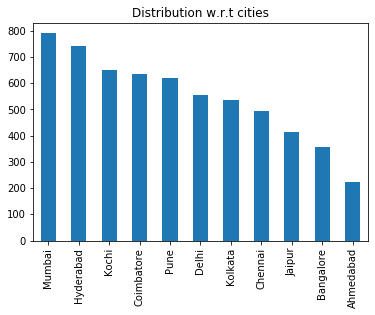

In [12]:
import matplotlib.pyplot as plt
data.Location.value_counts().plot(kind='bar')
plt.title('Distribution w.r.t cities')
plt.show()

## Brand

In [13]:
brand_name=[]
model_name=[]
for index, rows in data.iterrows():
    brand_name.append(rows['Name'].split()[0].lower())
    model_name.append(rows['Name'].split()[1].lower())

In [14]:
data['Brand'] = brand_name


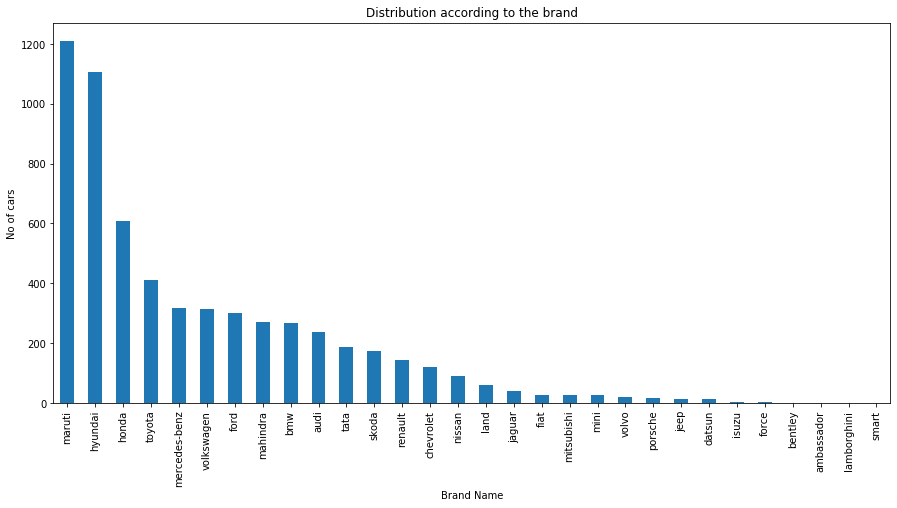

In [15]:
plt.rcParams["figure.figsize"] = [15,7]
data.Brand.value_counts().plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('No of cars')
plt.title('Distribution according to the brand')
plt.show()

# Year

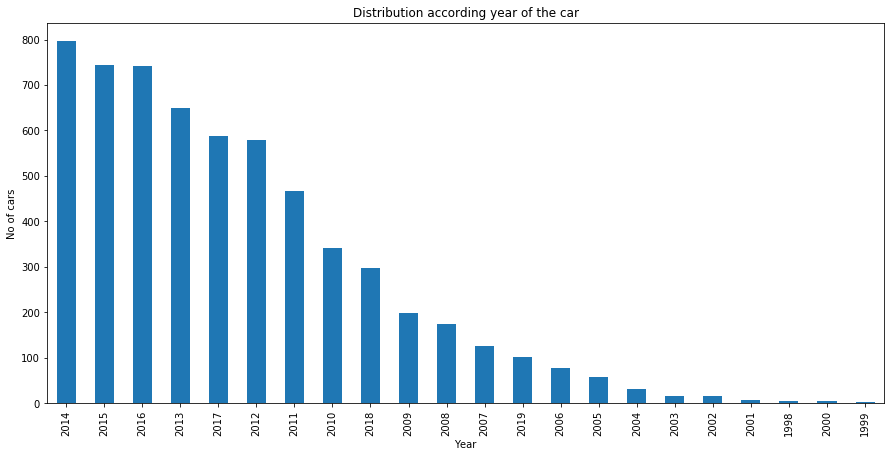

In [16]:
data.Year.value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No of cars')
plt.title('Distribution according year of the car')
plt.show()

#### Most of the cars are bought in 2014

# Outlier Identification and Null Value Filling

## Kilometers Driven

In [17]:
import numpy as np

p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Kilometers_Driven, i))

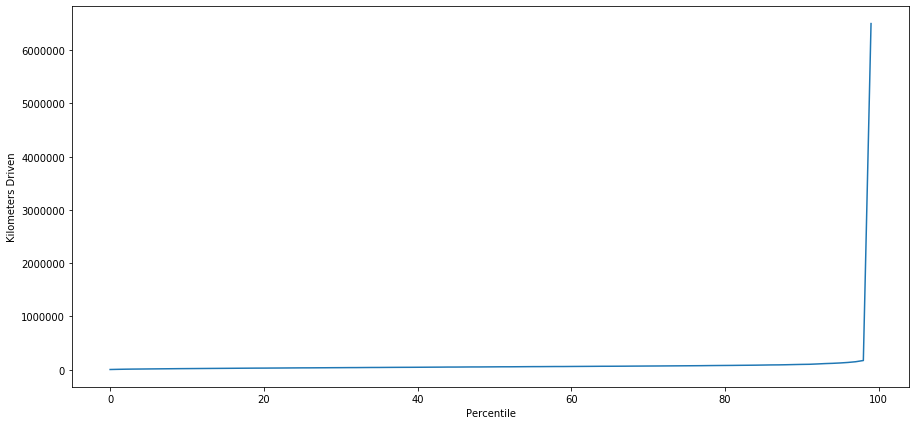

In [18]:
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Kilometers Driven')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in


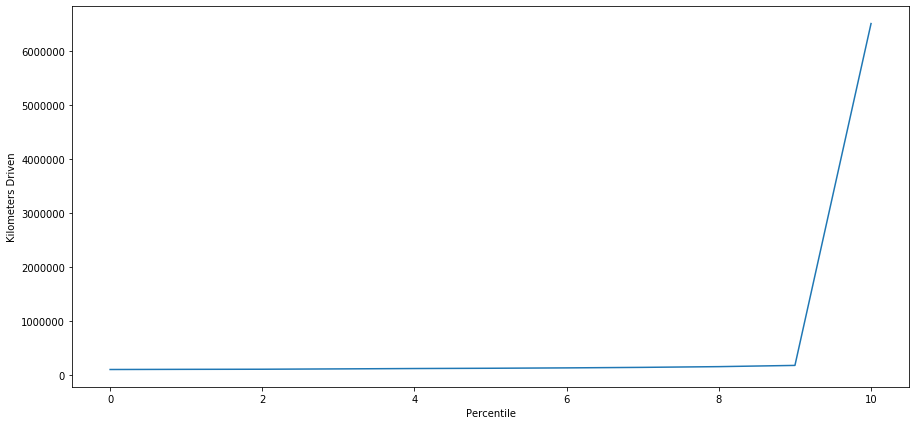

In [19]:
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data.Kilometers_Driven, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Kilometers Driven')
plt.show()



In [20]:
data[data['Kilometers_Driven']>600000]

Name Location  Year  \
340   Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata  2013   
358                    Hyundai i10 Magna 1.2  Chennai  2009   
1860        Volkswagen Vento Diesel Highline  Chennai  2013   
2328               BMW X5 xDrive 30d M Sport  Chennai  2017   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
340              775000    Diesel    Automatic      First   19.3 kmpl   
358              620000    Petrol       Manual      First  20.36 kmpl   
1860             720000    Diesel       Manual      First  20.54 kmpl   
2328            6500000    Diesel    Automatic      First  15.97 kmpl   

       Engine      Power  Seats  Price       Brand  
340   1968 CC    141 bhp    5.0    7.5       skoda  
358   1197 CC   78.9 bhp    5.0    2.7     hyundai  
1860  1598 CC  103.6 bhp    5.0    5.9  volkswagen  
2328  2993 CC    258 bhp    5.0   65.0         bmw

In [21]:
q=[]
for i in range(1,101,1):
    q.append(np.percentile(data.Price, i))

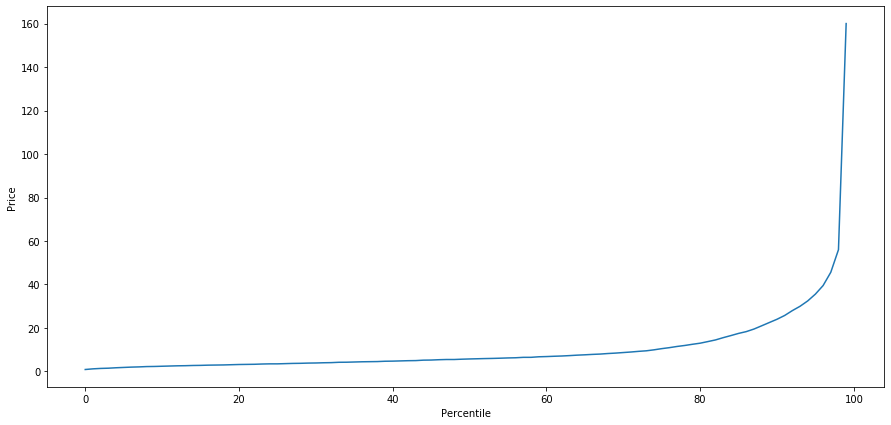

In [22]:
plt.plot(q)
plt.xlabel('Percentile')
plt.ylabel('Price')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

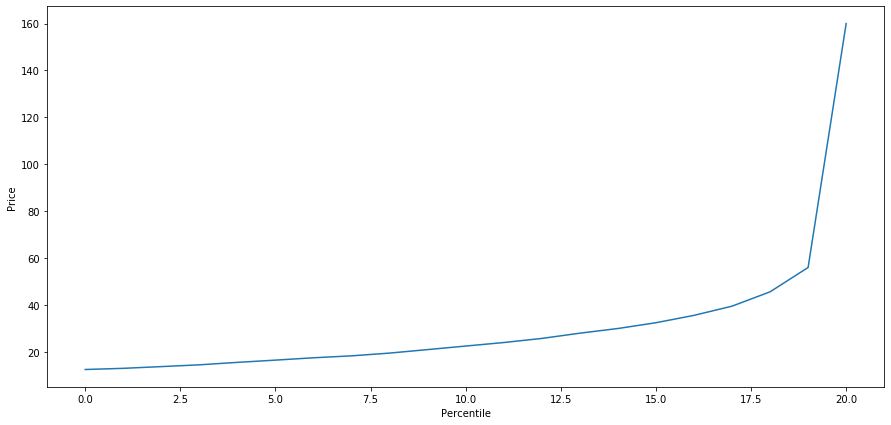

In [23]:
p=[]
for i in range(80,101,1):
    p.append(np.percentile(data.Price, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Price')
plt.show()

In [24]:
data[data['Price']>150]

Name   Location  Year  \
4079  Land Rover Range Rover 3.0 Diesel LWB Vogue  Hyderabad  2017   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
4079              25000    Diesel    Automatic      First  13.33 kmpl   

       Engine    Power  Seats  Price Brand  
4079  2993 CC  255 bhp    5.0  160.0  land

# Fuel_Type

In [25]:
data.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

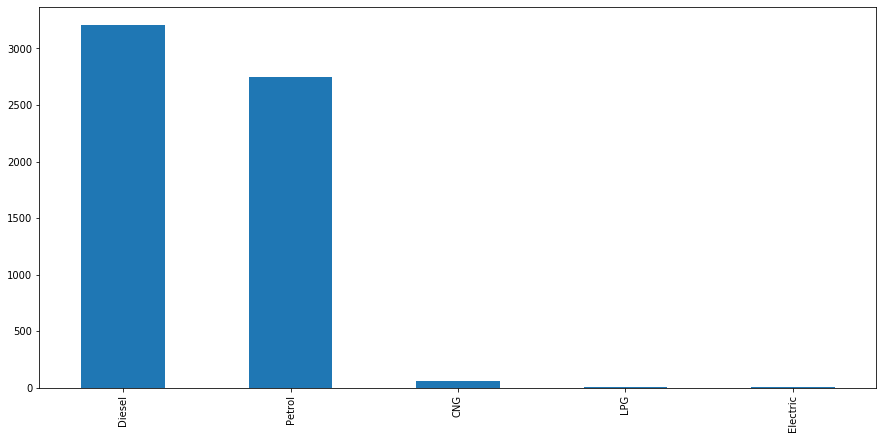

In [26]:
data.Fuel_Type.value_counts().plot(kind='bar')

##### Diesel cars are more in number

# Transmission

In [27]:
data.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

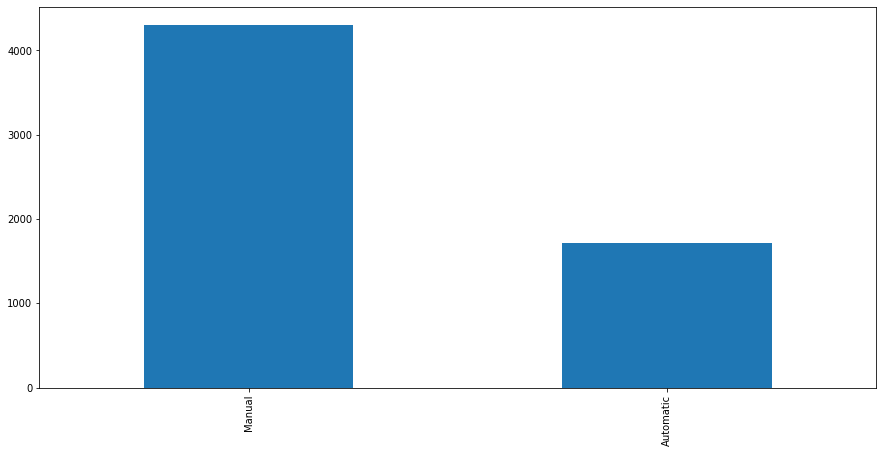

In [28]:
data.Transmission.value_counts().plot(kind='bar')

##### Manual cars are more than Automatic cars


# Owner_type

In [29]:
data.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


# Mileage

In [30]:
data[data['Mileage'].isnull()]

Name Location  Year  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai  2016              50000  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000  Electric   

     Transmission Owner_Type Mileage   Engine   Power  Seats  Price     Brand  
4446    Automatic      First     NaN    72 CC  41 bhp    5.0  13.00  mahindra  
4904    Automatic      First     NaN  1798 CC  73 bhp    5.0  12.75    toyota

In [31]:
data['is_electric']=data['Fuel_Type'].apply(lambda x: 1 if x=='Electric' else 0)

In [32]:
data.head(2)

Name Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   

   Price    Brand  is_electric  
0   1.75   maruti            0  
1  12.50  hyundai            0

##  Removig the CC,bhp,km/kg Units

In [33]:
Mileage_cleaned=[]
Engine_cleaned=[]
power_cleaned=[]
for index, rows in data.iterrows():
    try:
        Mileage_cleaned.append(rows['Mileage'].split()[0])
    except:
        Mileage_cleaned.append(0)
    try:
        Engine_cleaned.append(rows['Engine'].split()[0])
    except:
        Engine_cleaned.append(0)
    try:
        if rows['Power'].split()[0]=='null':
            power_cleaned.append(0)
        else:
            power_cleaned.append(rows['Power'].split()[0])
    except:
        power_cleaned.append(0)

In [34]:
data['Mileage_cleaned']=Mileage_cleaned
data.Mileage_cleaned = data.Mileage_cleaned.astype(float)
data['Engine_cleaned']=Engine_cleaned
data.Engine_cleaned = data.Engine_cleaned.astype(float)
data['Power_cleaned']=power_cleaned
data.Power_cleaned = data.Power_cleaned.astype(float)

In [35]:
data.head(2)

Name Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   

   Price    Brand  is_electric  Mileage_cleaned  Engine_cleaned  Power_cleaned  
0   1.75   maruti            0            26.60           998.0          58.16  
1  12.50  hyundai            0            19.67          1582.0         126.20

## Filling null values

#### Mileage


In [36]:
Mileage_missing=[]
for i,j in data[(data['Mileage_cleaned']==0)].iterrows():
    if j.Engine_cleaned!=0:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data[(data.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50)) & (data.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(data[(data.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
    else:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data[(data.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(0)

In [40]:
j=0
for i in data[(data['Mileage_cleaned']==0)]['Mileage_cleaned'].index.tolist():
    data['Mileage_cleaned'].iloc[i]=Mileage_missing[j]
    j+=1

In [41]:
data.Mileage_cleaned[data.Mileage_cleaned == 0] = data['Mileage_cleaned'].mean()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
data['Mileage_cleaned'].describe()

count    6019.000000
mean       18.328940
std         4.169318
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage_cleaned, dtype: float64

In [43]:
mileage_mean=data['Mileage_cleaned'].mean()

In [44]:
data["Mileage"].fillna(mileage_mean, inplace = True)

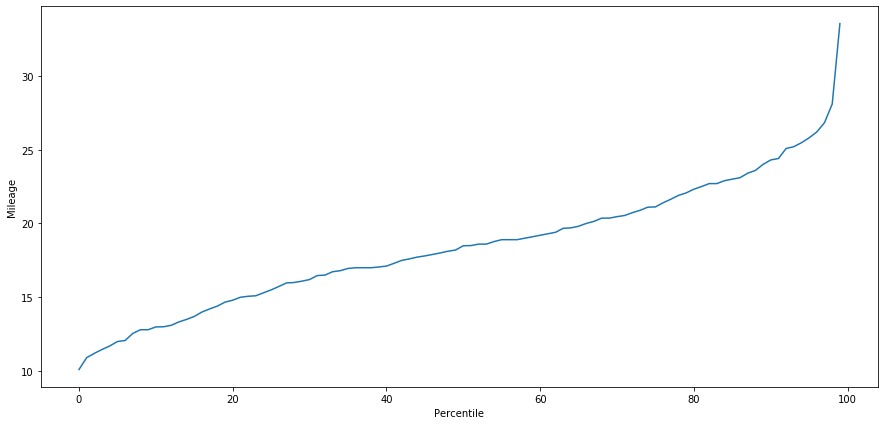

In [45]:
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Mileage_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Mileage')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

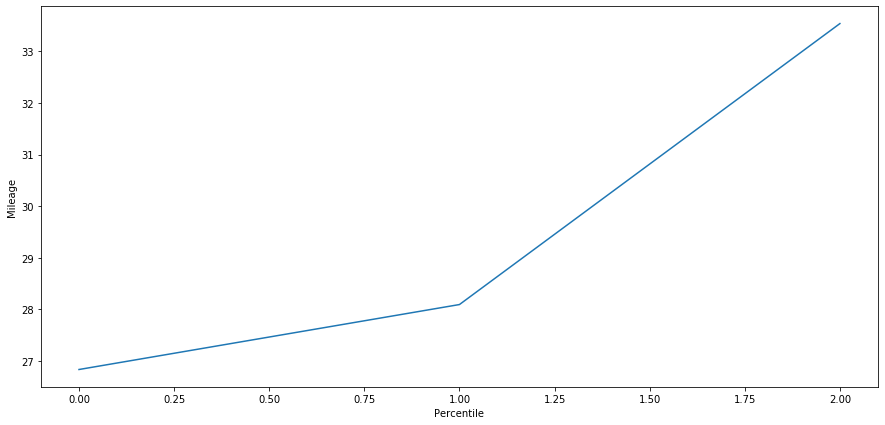

In [46]:
p=[]
for i in range(98,101,1):
    p.append(np.percentile(data.Mileage_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Mileage')
plt.show()

In [47]:
data[data['Mileage_cleaned']>33]

Name Location  Year  Kilometers_Driven  \
1269  Maruti Alto 800 2016-2019 CNG LXI   Mumbai  2018              10600   
1332             Maruti Wagon R CNG LXI     Pune  2013              79494   
2059             Maruti Wagon R CNG LXI   Mumbai  2013              54000   
2371             Maruti Wagon R CNG LXI     Pune  2014              29202   
3129             Maruti Wagon R CNG LXI    Delhi  2014              74663   
3553  Maruti Alto 800 2016-2019 CNG LXI     Pune  2015              18000   
3869  Maruti Alto 800 2016-2019 CNG LXI    Delhi  2012              65537   
4141             Maruti Wagon R CNG LXI   Mumbai  2014              47200   
4769  Maruti Alto 800 2016-2019 CNG LXI    Kochi  2017              24310   

     Fuel_Type Transmission Owner_Type      Mileage  Engine      Power  Seats  \
1269       CNG       Manual      First  33.44 km/kg  796 CC   40.3 bhp    4.0   
1332       CNG       Manual      First  33.54 km/kg  998 CC  67.04 bhp    5.0   
2059       CNG       Manual      First  33.54 km/kg  998 CC  67.04 bhp    5.0   
2371       CNG       Manual      First  33.54 km/kg  998 CC  67.04 bhp    5.0   
3129       CNG       Manual      First  33.54 km/kg  998 CC  67.04 bhp    5.0   
3553       CNG       Manual      First  33.44 km/kg  796 CC   40.3 bhp    4.0   
3869       CNG       Manual     Second  33.44 km/kg  796 CC   40.3 bhp    4.0   
4141       CNG       Manual      First  33.54 km/kg  998 CC  67.04 bhp    5.0   
4769       CNG       Manual      First  33.44 km/kg  796 CC   40.3 bhp    4.0   

      Price   Brand  is_electric  Mileage_cleaned  Engine_cleaned  \
1269   3.50  maruti            0            33.44           796.0   
1332   2.96  maruti            0            33.54           998.0   
2059   3.05  maruti            0            33.54           998.0   
2371   3.90  maruti            0            33.54           998.0   
3129   3.25  maruti            0            33.54           998.0   
3553   3.00  maruti            0            33.44           796.0   
3869   2.10  maruti            0            33.44           796.0   
4141   2.85  maruti            0            33.54           998.0   
4769   3.70  maruti            0            33.44           796.0   

      Power_cleaned  
1269          40.30  
1332          67.04  
2059          67.04  
2371          67.04  
3129          67.04  
3553          40.30  
3869          40.30  
4141          67.04  
4769          40.30

#### Engine

In [48]:
manual_petrol = data[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Manual')].Engine_cleaned.mean()
manual_diesel = data[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Manual')].Engine_cleaned.mean()
auto_diesel = data[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Automatic')].Engine_cleaned.mean()
auto_petrol = data[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Automatic')].Engine_cleaned.mean()

In [49]:
data.Engine_cleaned.loc[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Manual') & (data['Engine_cleaned']==0)] = manual_petrol
data.Engine_cleaned.loc[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Manual') & (data['Engine_cleaned']==0)] = manual_diesel
data.Engine_cleaned.loc[(data['Fuel_Type']=='Diesel') & (data['Transmission']=='Automatic') & (data['Engine_cleaned']==0)] = auto_diesel
data.Engine_cleaned.loc[(data['Fuel_Type']=='Petrol') & (data['Transmission']=='Automatic') & (data['Engine_cleaned']==0)] = auto_petrol

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
data['Engine_cleaned'].describe()

count    6019.000000
mean     1620.273483
std       600.566802
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine_cleaned, dtype: float64

In [51]:
engine_mean=data['Engine_cleaned'].mean()

In [52]:
data["Engine"].fillna(engine_mean, inplace = True)

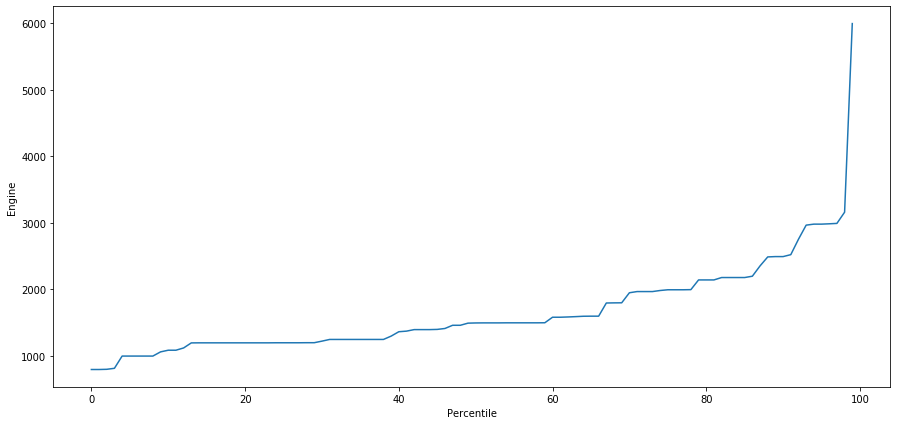

In [53]:
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Engine_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Engine')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

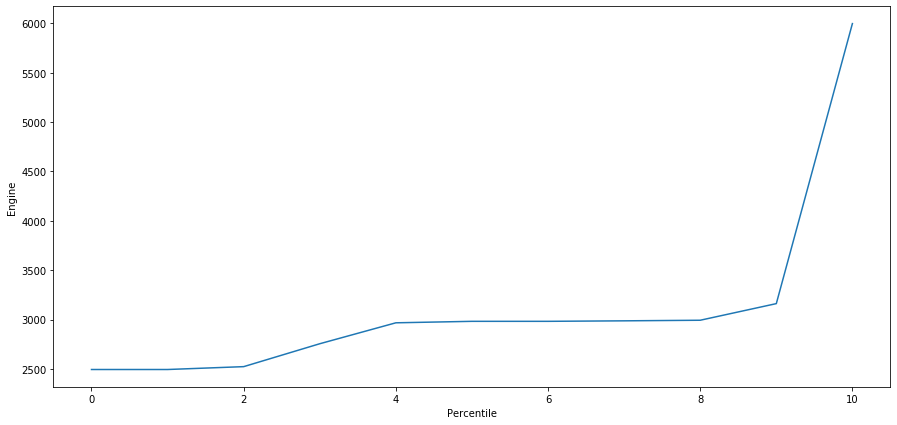

In [54]:
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data.Engine_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Engine')
plt.show()

In [55]:
data[data['Engine_cleaned']>5500]

Name   Location  Year  Kilometers_Driven  \
5521  Bentley Continental Flying Spur  Hyderabad  2006              48000   

     Fuel_Type Transmission Owner_Type   Mileage   Engine    Power  Seats  \
5521    Petrol    Automatic      First  8.6 kmpl  5998 CC  552 bhp    4.0   

      Price    Brand  is_electric  Mileage_cleaned  Engine_cleaned  \
5521   59.0  bentley            0              8.6          5998.0   

      Power_cleaned  
5521          552.0

#### Power

In [56]:
data[data.Power_cleaned == 0].head()

Name   Location  Year  Kilometers_Driven  \
76               Ford Fiesta 1.4 SXi TDCi     Jaipur  2008             111111   
79                 Hyundai Santro Xing XL  Hyderabad  2005              87591   
89                 Hyundai Santro Xing XO  Hyderabad  2007              73745   
120  Hyundai Santro Xing XL eRLX Euro III     Mumbai  2005             102000   
143   Hyundai Santro Xing XO eRLX Euro II      Kochi  2008              80759   

    Fuel_Type Transmission Owner_Type    Mileage   Engine     Power  Seats  \
76     Diesel       Manual      First  17.8 kmpl  1399 CC  null bhp    5.0   
79     Petrol       Manual      First   0.0 kmpl  1086 CC  null bhp    5.0   
89     Petrol       Manual      First  17.0 kmpl  1086 CC  null bhp    5.0   
120    Petrol       Manual     Second  17.0 kmpl  1086 CC  null bhp    5.0   
143    Petrol       Manual      Third  17.0 kmpl  1086 CC  null bhp    5.0   

     Price    Brand  is_electric  Mileage_cleaned  Engine_cleaned  \
76    2.00     ford            0        17.800000          1399.0   
79    1.30  hyundai            0        19.988571          1086.0   
89    2.10  hyundai            0        17.000000          1086.0   
120   0.85  hyundai            0        17.000000          1086.0   
143   1.67  hyundai            0        17.000000          1086.0   

     Power_cleaned  
76             0.0  
79             0.0  
89             0.0  
120            0.0  
143            0.0

In [57]:
Power_missing=[]
for i,j in data[(data['Power_cleaned']==0)].iterrows():
    Power_missing.append(data[(data.Mileage_cleaned.between(j.Mileage_cleaned-20,j.Mileage_cleaned+20)) 
                                      & (data.Engine_cleaned.between(j.Engine_cleaned-200,j.Engine_cleaned+200))]
                           ['Power_cleaned'].mean())

In [58]:
data['Power_cleaned'].describe()

count    6019.000000
mean      110.562372
std        55.956041
min         0.000000
25%        74.000000
50%        91.100000
75%       138.030000
max       560.000000
Name: Power_cleaned, dtype: float64

In [59]:
j=0
for i in data[(data['Power_cleaned']==0)]['Power_cleaned'].index.tolist():
    data['Power_cleaned'].iloc[i]=Power_missing[j]
    j+=1

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
power_mean=data['Power_cleaned'].mean()

In [61]:
data["Power"].fillna(power_mean, inplace = True)

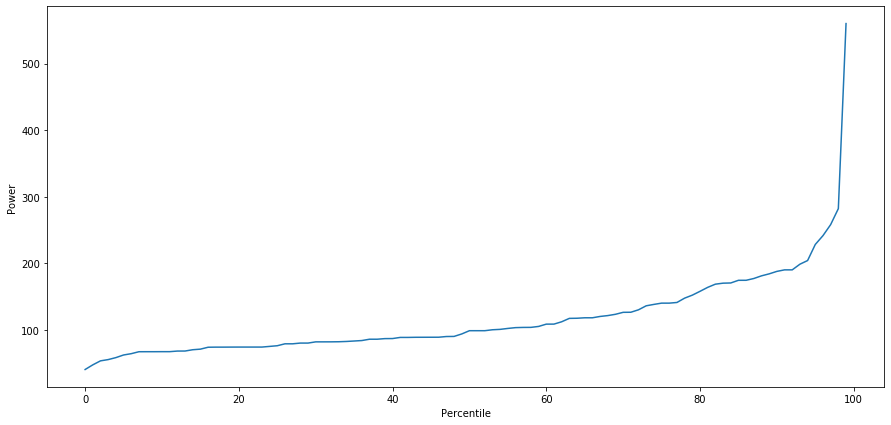

In [62]:
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data.Power_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Power')
plt.show()

As we see some kind of outlier in between 90th to 100th percentile so let's Zoom in

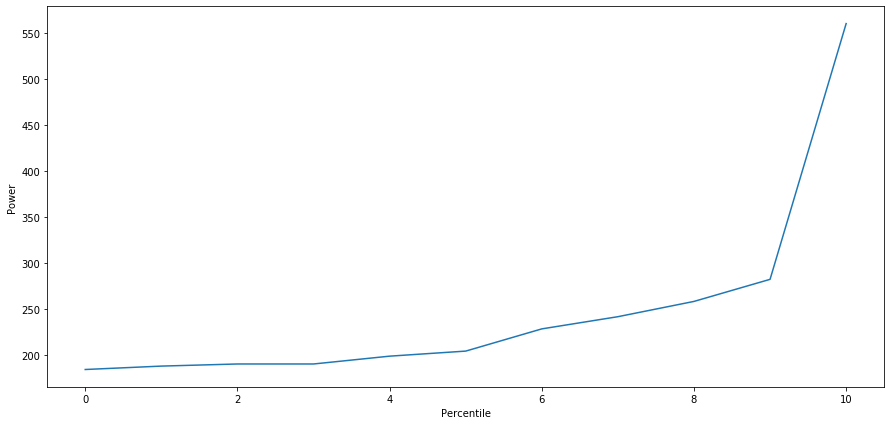

In [63]:
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data.Power_cleaned, i))
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Power')
plt.show()

In [64]:
data[data['Power_cleaned']>550]

Name   Location  Year  Kilometers_Driven  \
5521  Bentley Continental Flying Spur  Hyderabad  2006              48000   
5781       Lamborghini Gallardo Coupe      Delhi  2011               6500   

     Fuel_Type Transmission Owner_Type   Mileage   Engine    Power  Seats  \
5521    Petrol    Automatic      First  8.6 kmpl  5998 CC  552 bhp    4.0   
5781    Petrol    Automatic      Third  6.4 kmpl  5204 CC  560 bhp    2.0   

      Price        Brand  is_electric  Mileage_cleaned  Engine_cleaned  \
5521   59.0      bentley            0              8.6          5998.0   
5781  120.0  lamborghini            0              6.4          5204.0   

      Power_cleaned  
5521          552.0  
5781          560.0

## Seats


In [65]:
data.Seats.mean()

5.278735151413753

In [66]:
seats_missing=[]
for i,j in data[(data.Seats.isnull()) | (data.Seats== 0)].iterrows():
    seats_missing.append(data[data['Name'].str.match(" ".join((j['Name'].split()[0],j['Name'].split()[1])))]['Seats'].mean())

In [67]:
j=0
for i in data[(data.Seats.isnull()) | (data.Seats== 0)].index.tolist():
    data['Seats'].iloc[i]=seats_missing[j]
    j+=1

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [68]:
data.Seats[data.Seats == 0] = data['Seats'].mean()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
data = data.dropna()

In [70]:
seats_list=data["Seats"].values.tolist()

In [71]:
seats_mean = round(np.nanmean(seats_list, axis = 0))

In [72]:
data["Seats"].fillna(seats_mean, inplace = True)

### The null values were replaced by the mean of their respective columns as this is a better solution than removing rows or columns(loss of data), so this method yields better results.
### As the given data sets does not have a large number of outliers in each column(less than 1%), so replacing the null values with mean made more sense.

# One Hot Encoding (Categorical variables)

In [73]:
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price    Brand  is_electric  Mileage_cleaned  Engine_cleaned  Power_cleaned  
0   1.75   maruti            0            26.60           998.0          58.16  
1  12.50  hyundai            0            19.67          1582.0         126.20  
2   4.50    honda            0            18.20          1199.0          88.70  
3   6.00   maruti            0            20.77          1248.0          88.76  
4  17.74     audi            0            15.20          1968.0         140.80

In [74]:
data_cop = data.copy()

In [75]:
data_target = data['Price']
data_final = data.drop(['Name','Mileage','Engine','Power','Price'],axis=1)

In [76]:
data_final.columns


Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Brand', 'is_electric', 'Mileage_cleaned',
       'Engine_cleaned', 'Power_cleaned'],
      dtype='object')

In [77]:
data_final.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats    Brand  is_electric  Mileage_cleaned  Engine_cleaned  Power_cleaned  
0    5.0   maruti            0            26.60           998.0          58.16  
1    5.0  hyundai            0            19.67          1582.0         126.20  
2    5.0    honda            0            18.20          1199.0          88.70  
3    7.0   maruti            0            20.77          1248.0          88.76  
4    5.0     audi            0            15.20          1968.0         140.80

## Data Scaling and Train test split

In [78]:
for i in ['Kilometers_Driven','Mileage_cleaned','Engine_cleaned', 'Power_cleaned']:
    data_final[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(data_final[i].values.astype(float).reshape(-1,1))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data_final, data_target, test_size=0.33)

In [80]:
X_train

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
3083       Kochi  2013           0.011403    Diesel       Manual      First   
1304       Delhi  2013           0.009786    Petrol       Manual      First   
5406      Jaipur  2015           0.007666    Diesel       Manual     Second   
2654  Coimbatore  2010           0.015531    Diesel    Automatic      First   
375      Chennai  2007           0.011051    Petrol       Manual      Third   
...          ...   ...                ...       ...          ...        ...   
3879      Mumbai  2016           0.004358    Petrol       Manual      First   
1672      Jaipur  2011           0.012282    Diesel       Manual     Second   
814         Pune  2004           0.011937    Diesel       Manual     Second   
5797     Kolkata  2012           0.004435    Petrol       Manual      First   
5971   Hyderabad  2013           0.009974    Diesel       Manual     Second   

      Seats       Brand  is_electric  Mileage_cleaned  Engine_cleaned  \
3083    5.0      toyota            0         0.553795        0.218022   
1304    5.0     hyundai            0         0.445836        0.189841   
5406    5.0     hyundai            0         0.648489        0.176848   
2654    5.0         bmw            0         0.169492        0.492913   
375     4.0      maruti            0         0.357406        0.122173   
...     ...         ...          ...              ...             ...   
3879    5.0       honda            0         0.453206        0.190179   
1672    5.0      nissan            0         0.482682        0.234391   
814    10.0      toyota            0         0.246868        0.400607   
5797    5.0     hyundai            0         0.514370        0.189841   
5971    5.0  volkswagen            0         0.506264        0.240634   

      Power_cleaned  
3083       0.100799  
1304       0.092621  
5406       0.068087  
2654       0.381894  
375        0.005325  
...             ...  
3879       0.103652  
1672       0.123152  
814        0.077596  
5797       0.085013  
5971       0.102320  

[4030 rows x 12 columns]

In [81]:
X_test

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
773      Kolkata  2011           0.007666    Petrol       Manual     Second   
2828  Coimbatore  2018           0.002851    Diesel       Manual      First   
5070       Kochi  2010           0.004676    Petrol    Automatic      First   
1759  Coimbatore  2016           0.009683    Diesel    Automatic     Second   
4446     Chennai  2016           0.007666  Electric    Automatic      First   
...          ...   ...                ...       ...          ...        ...   
3128      Mumbai  2012           0.003536    Petrol       Manual      First   
4609  Coimbatore  2017           0.009217    Diesel       Manual      First   
2241  Coimbatore  2015           0.005081    Petrol       Manual      First   
1224      Jaipur  1999           0.010743    Petrol       Manual     Second   
2232        Pune  2011           0.008794    Petrol       Manual      First   

      Seats       Brand  is_electric  Mileage_cleaned  Engine_cleaned  \
773     5.0      maruti            0         0.445836        0.189841   
2828    5.0        fiat            0         0.519528        0.198448   
5070    5.0     hyundai            0         0.471629        0.189841   
1759    5.0         bmw            0         0.431835        0.324502   
4446    5.0    mahindra            1         0.174272        0.000000   
...     ...         ...          ...              ...             ...   
3128    5.0        ford            0         0.338983        0.189673   
4609    5.0     hyundai            0         0.488946        0.254809   
2241    5.0      maruti            0         0.467944        0.189841   
1224    5.0      maruti            0         0.401621        0.155417   
2232    5.0  volkswagen            0         0.318349        0.257509   

      Power_cleaned  
773        0.098136  
2828       0.109395  
5070       0.087105  
1759       0.296310  
4446       0.012933  
...             ...  
3128       0.068125  
4609       0.174971  
2241       0.098136  
1224       0.049068  
2232       0.131989  

[1986 rows x 12 columns]

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4030, 12), (1986, 12), (4030,), (1986,))

### Converting train to one hot encoding

In [89]:
encoded = ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
encoded.fit(data_final)

OneHotEncoder(cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
                    'Brand'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='ignore', return_df=True, use_cat_names=True,
              verbose=0)

In [90]:
X_train_encoded=encoded.transform(X_train)

In [91]:
X_train_encoded.head()

Location_Mumbai  Location_Pune  Location_Chennai  Location_Coimbatore  \
3083                0              0                 0                    0   
1304                0              0                 0                    0   
5406                0              0                 0                    0   
2654                0              0                 0                    1   
375                 0              0                 1                    0   

      Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
3083                   0                0               1                 0   
1304                   0                0               0                 0   
5406                   0                1               0                 0   
2654                   0                0               0                 0   
375                    0                0               0                 0   

      Location_Delhi  Location_Bangalore  ...  Brand_smart  Brand_ambassador  \
3083               0                   0  ...            0                 0   
1304               1                   0  ...            0                 0   
5406               0                   0  ...            0                 0   
2654               0                   0  ...            0                 0   
375                0                   0  ...            0                 0   

      Brand_isuzu  Brand_force  Brand_bentley  Brand_lamborghini  is_electric  \
3083            0            0              0                  0            0   
1304            0            0              0                  0            0   
5406            0            0              0                  0            0   
2654            0            0              0                  0            0   
375             0            0              0                  0            0   

      Mileage_cleaned  Engine_cleaned  Power_cleaned  
3083         0.553795        0.218022       0.100799  
1304         0.445836        0.189841       0.092621  
5406         0.648489        0.176848       0.068087  
2654         0.169492        0.492913       0.381894  
375          0.357406        0.122173       0.005325  

[5 rows x 59 columns]

In [92]:
X_test_encoded=encoded.transform(X_test)

In [93]:
X_test_encoded.shape

(1986, 59)

In [94]:
for i in X_train_encoded.columns:
    if len(X_train_encoded[X_train_encoded[i].isnull()].index)>0:
        print(i,' Has Null values count : ',len(X_train_encoded[X_train_encoded[i].isnull()].index))

# Linear Regression

In [101]:
linearRegression = LinearRegression()
linearRegression.fit(X_train_encoded, y_train)
y_pred = linearRegression.predict(X_test_encoded)
r2_score(y_test, y_pred)

0.7724814734585204

Error metrics when Linear Regression is used

In [102]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  2.95818919939577
Mean Squared  Error      :  30.0425330581957
Root Mean Squared  Error :  5.481106919062581
R Squared Error          :  0.7724814734585204


# Random Forest

In [103]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_encoded, y_train)
y_pred = rf.predict(X_test_encoded)
r2_score(y_test, y_pred)

0.9076238248524957

Error metric when random forest method is used

In [104]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.5111931799980822
Mean Squared  Error      :  12.197750828667631
Root Mean Squared  Error :  3.492527856534237
R Squared Error          :  0.9076238248524957


## Random Forest give better accuracy as compared to Linear Regression